In [1]:
import numpy as np
import matplotlib.pyplot as plt

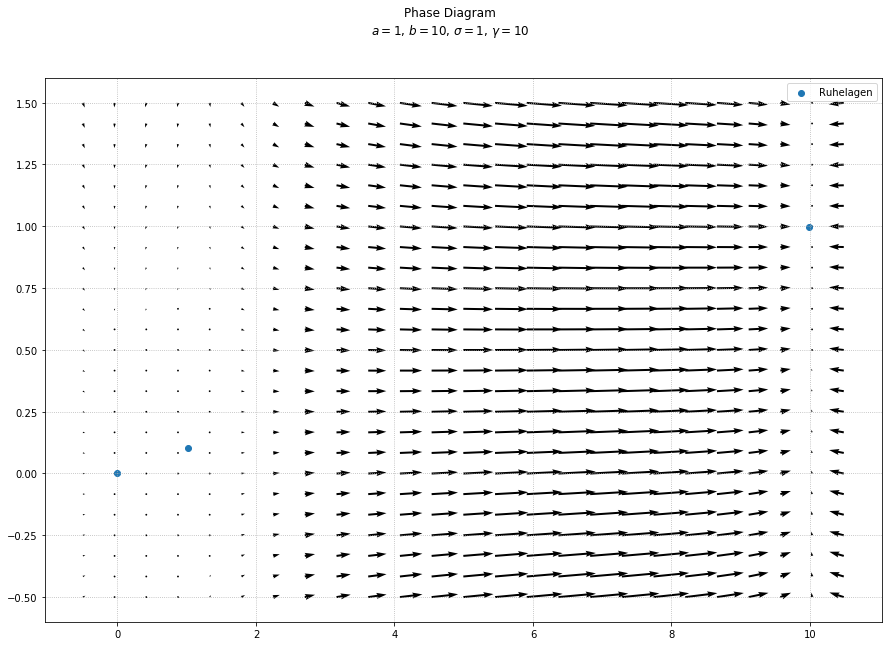

In [2]:
# ---------------- #

a = 1
b = 10

sigma = 1
gamma = 10

assert 0 < a < b and sigma > 0 and gamma > 0

f = lambda x, y: np.array([-x * (x - a) * (x - b) - y, sigma * x - gamma * y])

sqrt = np.sqrt( ((a-b) / 2)**2 - sigma/gamma)
ruhe_x = np.array([0, (a+b)/2 - sqrt, (a+b)/2 + sqrt])
ruhe_y = ruhe_x * (sigma/gamma)

# ---------------- #

border = 0.5

a_x = min(ruhe_x) - border
b_x = max(ruhe_x) + border
n_x = 25

a_y = min(ruhe_y) - border
b_y = max(ruhe_y) + border
n_y = n_x

# ---------------- #

x = np.linspace(a_x, b_x, n_x)
y = np.linspace(a_y, b_y, n_y)

X, Y = np.meshgrid(x, y)
u, v = f(X, Y)

fig = plt.figure(figsize = (15, 10))

plt.quiver(X, Y, u, v)
plt.scatter(ruhe_x, ruhe_y, label = 'Ruhelagen')

title = ''
title += 'Phase Diagram'
title += '\n'
title += '$a = {}$, $b = {}$, $\sigma = {}$, $\gamma = {}$'.format(a, b, sigma, gamma)
plt.suptitle(title)
plt.legend()
plt.grid(linestyle = ':')

plt.show()

# ---------------- #

In [37]:
import sympy as sp

In [39]:
x, y = sp.symbols('x y')
a, b = sp.symbols('a b')
sigma, gamma = sp.symbols('sigma gamma')

f = lambda x, y: sp.Matrix([-x * (x - a) * (x - b) - y, sigma * x - gamma * y])

print('#', '-'*32, '#', '\n')

expr = f(x, y).jacobian([x, y])
expr = sp.expand(expr)
display(expr)

print('#', '-'*32, '#', '\n')

expr = expr.subs(x, 0)
expr = expr.subs(y, 0)

display(expr)

print('#', '-'*32, '#', '\n')

for eigen_pair in expr.eigenvals():
    display(eigen_pair)

print('#', '-'*32, '#', '\n')


# -------------------------------- # 



Matrix([
[-a*b + 2*a*x + 2*b*x - 3*x**2,     -1],
[                        sigma, -gamma]])

# -------------------------------- # 



Matrix([
[ -a*b,     -1],
[sigma, -gamma]])

# -------------------------------- # 



-a*b/2 - gamma/2 - sqrt(a**2*b**2 - 2*a*b*gamma + gamma**2 - 4*sigma)/2

-a*b/2 - gamma/2 + sqrt(a**2*b**2 - 2*a*b*gamma + gamma**2 - 4*sigma)/2

# -------------------------------- # 

